In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
mydata = pd.read_csv('features.csv', delimiter=';', usecols=['is_featured', 'version', 'tags_number', 'score', 
                                                             'is_best_time_to_launch', 'is_best_day_to_launch', 'is_weekend', 
                                                             'discretized_positive_description_score', 
                                                             'discretized_negative_description_score', 
                                                             'text_description_length', 'sentence_length_in_the_description', 
                                                             'bullet_points_explicit_features', 'emoji_in_description', 
                                                             'tagline_length', 'emoji_in_tagline', 'are_there_video', 
                                                             'are_there_tweetable_images', 'are_there_gif_images', 
                                                             'number_of_gif', 'offers', 'promo_discount_codes', 
                                                             'are_there_questions', 'hunter_has_twitter', 'hunter_has_website', 
                                                             'hunter_followers', 'hunter_apps_made', 
                                                             'hunter_follows_up_on_comments', 'hunter_is_maker', 
                                                             'maker_has_twitter', 'maker_has_website', 'maker_followers', 
                                                             'maker_follows_up_on_comments', 
                                                             'discretized_maker_positive_comment_score', 
                                                             'discretized_maker_negative_comment_score', 
                                                             'discretized_others_positive_comment_score', 
                                                             'discretized_others_negative_comment_score', 
                                                             'topic'])

mydata = mydata.rename(columns = {'discretized_positive_description_score': 'positive_description_sentiment', 
                         'discretized_negative_description_score': 'negative_description_sentiment', 
                         'discretized_maker_positive_comment_score': 'maker_positive_comment',
                         'discretized_maker_negative_comment_score': 'maker_negative_comment',
                         'discretized_others_positive_comment_score': 'others_positive_comment', 
                         'discretized_others_negative_comment_score': 'others_negative_comment'})

pd.set_option('display.max_columns', 38)
mydata.head()

,version,tags_number,is_featured,score,is_best_time_to_launch,is_best_day_to_launch,is_weekend,positive_description_sentiment,negative_description_sentiment,text_description_length,sentence_length_in_the_description,bullet_points_explicit_features,emoji_in_description,tagline_length,emoji_in_tagline,are_there_video,are_there_tweetable_images,are_there_gif_images,number_of_gif,offers,promo_discount_codes,are_there_questions,hunter_has_twitter,hunter_has_website,hunter_followers,hunter_apps_made,hunter_follows_up_on_comments,hunter_is_maker,maker_has_twitter,maker_has_website,maker_followers,maker_follows_up_on_comments,maker_positive_comment,maker_negative_comment,others_positive_comment,others_negative_comment,topic
0,1.0,4,Yes,2771,Yes,Yes,No,True,False,Short,Short,No,No,Long,No,No,Yes,No,0,No,No,Yes,Yes,Yes,Low,Medium,Yes,No,Yes,Yes,Low,No,False,False,True,True,web development
1,1.0,6,Yes,313,No,No,No,True,False,Medium,Medium,No,No,Long,No,No,No,No,0,No,No,No,Yes,Yes,Low,Low,Yes,No,Yes,Yes,Low,Yes,False,False,True,False,web development
2,1.0,2,Yes,442,Yes,No,No,True,True,Long,Short,No,No,Long,No,No,No,No,0,No,No,No,Yes,No,High,High,Yes,No,Yes,Yes,Low,No,False,False,True,False,web development
3,1.0,3,Yes,208,No,No,Yes,True,False,Long,Short,No,No,Long,No,Yes,No,No,0,No,No,No,No,Yes,Low,Low,No,Yes,No,Yes,Low,No,False,False,False,False,community
4,1.0,4,Yes,166,No,No,No,False,True,Medium,Short,No,No,Medium,No,No,No,Yes,1,No,No,No,Yes,No,Low,Low,No,No,Yes,Yes,Low,Yes,True,True,True,True,community


# Standardizzazione dati dataset

In [3]:
from sklearn.preprocessing import StandardScaler

# Create the Scaler object
scaler = StandardScaler()

# Fit your data on the scaler object
# mydata = scaler.fit_transform(mydata)
# mydata['version'] = scaler.fit_transform(mydata['version'].values.reshape(-1,1))
mydata[['version', 'tags_number', 'score', 'number_of_gif']] = scaler.fit_transform(mydata[['version', 'tags_number', 'score', 
                                                                                            'number_of_gif']])

In [4]:
mydata.to_csv('standardized_features.csv', sep=';', index=False)

In [5]:
mydata.head()

,version,tags_number,is_featured,score,is_best_time_to_launch,is_best_day_to_launch,is_weekend,positive_description_sentiment,negative_description_sentiment,text_description_length,sentence_length_in_the_description,bullet_points_explicit_features,emoji_in_description,tagline_length,emoji_in_tagline,are_there_video,are_there_tweetable_images,are_there_gif_images,number_of_gif,offers,promo_discount_codes,are_there_questions,hunter_has_twitter,hunter_has_website,hunter_followers,hunter_apps_made,hunter_follows_up_on_comments,hunter_is_maker,maker_has_twitter,maker_has_website,maker_followers,maker_follows_up_on_comments,maker_positive_comment,maker_negative_comment,others_positive_comment,others_negative_comment,topic
0,-0.252493,0.546302,Yes,10.265108,Yes,Yes,No,True,False,Short,Short,No,No,Long,No,No,Yes,No,-0.469332,No,No,Yes,Yes,Yes,Low,Medium,Yes,No,Yes,Yes,Low,No,False,False,True,True,web development
1,-0.252493,1.646996,Yes,0.629492,No,No,No,True,False,Medium,Medium,No,No,Long,No,No,No,No,-0.469332,No,No,No,Yes,Yes,Low,Low,Yes,No,Yes,Yes,Low,Yes,False,False,True,False,web development
2,-0.252493,-0.554393,Yes,1.135185,Yes,No,No,True,True,Long,Short,No,No,Long,No,No,No,No,-0.469332,No,No,No,Yes,No,High,High,Yes,No,Yes,Yes,Low,No,False,False,True,False,web development
3,-0.252493,-0.004046,Yes,0.217881,No,No,Yes,True,False,Long,Short,No,No,Long,No,Yes,No,No,-0.469332,No,No,No,No,Yes,Low,Low,No,Yes,No,Yes,Low,No,False,False,False,False,community
4,-0.252493,0.546302,Yes,0.053237,No,No,No,False,True,Medium,Short,No,No,Medium,No,No,No,Yes,0.650794,No,No,No,Yes,No,Low,Low,No,No,Yes,Yes,Low,Yes,True,True,True,True,community


# Matrice di correlazione tra le feature numeriche nel dataset

In [6]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
numerical_data = pd.read_csv('standardized_features.csv', delimiter=';', 
                             usecols=['version', 'tags_number', 'score', 'number_of_gif'])
correlation_matrix = numerical_data.corr(method='pearson')
correlation_matrix

,version,tags_number,score,number_of_gif
version,1.000000,0.008285,0.054630,0.032613
tags_number,0.008285,1.000000,0.077091,0.084374
score,0.054630,0.077091,1.000000,0.159901
number_of_gif,0.032613,0.084374,0.159901,1.000000


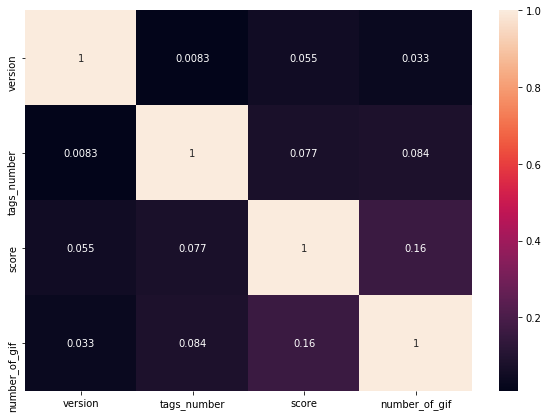

In [8]:
plt.figure(figsize=(10,7))
sn.heatmap(correlation_matrix, annot=True)
plt.savefig('correlation_matrix_of_features_initial_model.png')

# Impostazione delle variabili di default per la regressione logistica

Per impostare le variabili di default durante l'esecuzione della regressione logistica sono state create delle variabili `dummy`. In particolare:
- per le variabili booleane è stato impostato come default il valore *No*
- per la lunghezza della descrizione, delle frasi presenti nella descrizione e della tagline di ogni post è stato impostato come default il valore *Short*
- per il numero di follower degli hunter, per il numero di follower dei maker e per il numero di applicazioni/prodotti fatti dall'hunter è stato impostato come default il valore *High*
- per la variabile topic è stato impostato come default il valore *web development*

In [9]:
mydata = pd.get_dummies(mydata, columns=['is_best_time_to_launch', 'is_best_day_to_launch', 'is_weekend', 
                                         'positive_description_sentiment', 'negative_description_sentiment',
                                         'bullet_points_explicit_features', 'emoji_in_description', 'emoji_in_tagline', 
                                         'are_there_video', 'are_there_tweetable_images', 'are_there_gif_images', 'offers', 
                                         'promo_discount_codes', 'are_there_questions', 'hunter_has_twitter', 
                                         'hunter_has_website', 'hunter_follows_up_on_comments', 'hunter_is_maker', 
                                         'maker_has_twitter', 'maker_has_website', 'maker_follows_up_on_comments',
                                         'maker_positive_comment', 'maker_negative_comment', 'others_positive_comment', 
                                         'others_negative_comment'], drop_first=True)

mydata = mydata.rename(columns = {'positive_description_sentiment_True': 'positive_description_sentiment', 
                                  'negative_description_sentiment_True': 'negative_description_sentiment', 
                                  'maker_positive_comment_True': 'maker_positive_comment', 
                                  'maker_negative_comment_True': 'maker_negative_comment', 
                                  'others_positive_comment_True': 'others_positive_comment', 
                                  'others_negative_comment_True': 'others_negative_comment'})

In [10]:
mydata = pd.get_dummies(mydata, columns=['text_description_length', 'sentence_length_in_the_description', 'tagline_length', 
                                         'hunter_followers', 'hunter_apps_made', 'maker_followers'])

mydata = mydata.drop(['text_description_length_Short', 'sentence_length_in_the_description_Short', 'tagline_length_Short', 
                     'hunter_followers_High', 'hunter_apps_made_High', 'maker_followers_High'], axis=1)

In [11]:
mydata = pd.get_dummies(mydata, columns = ['topic'])
mydata = mydata.drop(['topic_web development'], axis=1)

In [12]:
pd.set_option('display.max_columns', 46)
mydata.head()

,version,tags_number,is_featured,score,number_of_gif,is_best_time_to_launch_Yes,is_best_day_to_launch_Yes,is_weekend_Yes,positive_description_sentiment,negative_description_sentiment,bullet_points_explicit_features_Yes,emoji_in_description_Yes,emoji_in_tagline_Yes,are_there_video_Yes,are_there_tweetable_images_Yes,are_there_gif_images_Yes,offers_Yes,promo_discount_codes_Yes,are_there_questions_Yes,hunter_has_twitter_Yes,hunter_has_website_Yes,hunter_follows_up_on_comments_Yes,hunter_is_maker_Yes,maker_has_twitter_Yes,maker_has_website_Yes,maker_follows_up_on_comments_Yes,maker_positive_comment,maker_negative_comment,others_positive_comment,others_negative_comment,text_description_length_Long,text_description_length_Medium,sentence_length_in_the_description_Long,sentence_length_in_the_description_Medium,tagline_length_Long,tagline_length_Medium,hunter_followers_Low,hunter_followers_Medium,hunter_apps_made_Low,hunter_apps_made_Medium,maker_followers_Low,maker_followers_Medium,topic_community,topic_creativity
0,-0.252493,0.546302,Yes,10.265108,-0.469332,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0
1,-0.252493,1.646996,Yes,0.629492,-0.469332,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0
2,-0.252493,-0.554393,Yes,1.135185,-0.469332,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,-0.252493,-0.004046,Yes,0.217881,-0.469332,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
4,-0.252493,0.546302,Yes,0.053237,0.650794,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0


# Implementazione del modello per la regressione logistica

Per realizzare la regressione logistica è stato richiamato il metodo **from_formula** fornito dalla classe **GLM() (Generalized Linear Models)** presente nel package `statsmodels`. Questo metodo ha come parametri di input:
* **formula** è una stringa rappresentante una formula che separa la variabile dipendente dalle variabili indipendenti
* **data** rappresenta il dataset necessario per costruire il modello
* **family** indica la distribuzione della variabile dipendente. In questo caso è Binomial che prende come parametro di default il link *logit* in quanto dobbiamo realizzare la regressione logistica.

Successivamente è stato costruito il modello richiamando la funzione `fit`.

In [13]:
import statsmodels.api as sm

In [14]:
myformula = 'is_featured ~ version + tags_number + score + is_best_time_to_launch_Yes + is_best_day_to_launch_Yes + is_weekend_Yes + positive_description_sentiment + negative_description_sentiment + text_description_length_Medium + text_description_length_Long + sentence_length_in_the_description_Medium + sentence_length_in_the_description_Long + bullet_points_explicit_features_Yes + emoji_in_description_Yes + tagline_length_Medium + tagline_length_Long + emoji_in_tagline_Yes + are_there_video_Yes + are_there_tweetable_images_Yes + are_there_gif_images_Yes + number_of_gif + offers_Yes + promo_discount_codes_Yes + are_there_questions_Yes + hunter_has_twitter_Yes + hunter_has_website_Yes + hunter_followers_Low + hunter_followers_Medium + hunter_apps_made_Low + hunter_apps_made_Medium + hunter_follows_up_on_comments_Yes + hunter_is_maker_Yes + maker_has_twitter_Yes + maker_has_website_Yes + maker_followers_Low + maker_followers_Medium + maker_follows_up_on_comments_Yes + maker_positive_comment + maker_negative_comment + others_positive_comment + others_negative_comment + topic_community + topic_creativity'
model = sm.GLM.from_formula(formula=myformula, data=mydata, family=sm.families.Binomial())
results = model.fit()

Richiamando la funzione `summary` è possibile osservare i risultati del modello costruito.

In [15]:
print(results.summary().tables[0])

                            Generalized Linear Model Regression Results                            
Dep. Variable:     ['is_featured[No]', 'is_featured[Yes]']   No. Observations:                 3537
Model:                                                 GLM   Df Residuals:                     3493
Model Family:                                     Binomial   Df Model:                           43
Link Function:                                       logit   Scale:                          1.0000
Method:                                               IRLS   Log-Likelihood:                -678.08
Date:                                     Wed, 04 Dec 2019   Deviance:                       1356.2
Time:                                             04:27:29   Pearson chi2:                 4.53e+15
No. Iterations:                                         23                                         
Covariance Type:                                 nonrobust                                         


In [16]:
print("Likelihood of specified model: {}".format(round(results.llf , 2)))
print("Likelihood of Intercept only model: {}".format(round(results.llnull, 2)))
print("Number of observations: {}".format(model.nobs))

Likelihood of specified model: -678.08
Likelihood of Intercept only model: -2405.69
Number of observations: 3537


### Goodness of fit (Nagelkerke' R-squared) del modello

In [17]:
import math

power = 2 / model.nobs
cox_and_snell_r_squared = 1 - math.pow((results.llnull / results.llf), power)
denominator = 1 - math.pow((-results.llnull), power)
nagelkerke_r_squared = cox_and_snell_r_squared / denominator

print("Nagelkerke' r squared: {}".format(round(nagelkerke_r_squared, 3)))

Nagelkerke' r squared: 0.162


### Risultati del modello

In [18]:
# Note that the summary table is a list. The table at index 1 is the "core" table. 
# Additionally, read_html puts dataframe in a list, so we want index 0
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
logistic = pd.read_html(results_as_html, header=0, index_col=0)[0]

In [19]:
# Convert html table into csv file
logistic.to_csv('logistic_regression_results.csv', sep=';', columns=logistic.columns)
temp = pd.read_csv('logistic_regression_results.csv', delimiter=';')
temp.rename(columns={temp.columns[0]: "Predictor"}, inplace = True)
temp.to_csv('logistic_regression_results.csv', sep=';', index=False)

Successivamente è stato calcolato il valore di **Odds Ratio** per ogni coefficiente utilizzando la funzione *exp** fornita dal package `numpy` e che prende come parametro di input il coefficiente.

In [20]:
# Calculate Odds Ratio
def calculate_odds_ratio(coefficient_column):
    odds_ratio = []
    for i in range(0, len(coefficient_column)):
        if not odds_ratio:
            odds_ratio.append('-')
        else:
            odds_ratio.append(round(np.exp(coefficient_column[i]), 3))
    return odds_ratio

df = pd.read_csv('logistic_regression_results.csv', delimiter=';')
odds_ratio = calculate_odds_ratio(df['coef'])
print(odds_ratio)

['-', 0.915, 1.065, 0.94, 1.678, 2.243, 1.132, 1.087, 1.135, 0.887, 1.022, 1.061, 1.323, 3.857, 1.214, 0.764, 0.893, 0.386, 0.706, 1.103, 1.284, 0.935, 0.913, 1.015, 0.695, 0.81, 1.119, 0.0, 0.0, 66681940761.045, 32734650430.057, 0.673, 1.035, 1.209, 0.0, 0.0, 3.779, 1.009, 0.988, 1.353, 0.63, 1.37, 1.025, 0.974, 1.06]


In [21]:
# Add Odds Ratio column to logistic regression summary table
df.insert(2, 'Odds Ratio', odds_ratio)
df.to_csv('logistic_regression_results.csv', sep=';', index=False)

In [22]:
def make_bold(s):
    if s['P>|z|'] < 0.05:
        return ['font-weight: bold']*8
    else:
        return ['font-weight: normal']*8

logistic_regression_results = pd.read_csv('logistic_regression_results.csv', delimiter=';')
logistic_regression_results.style.apply(make_bold, axis=1)

,Predictor,coef,Odds Ratio,std err,z,P>|z|,[0.025,0.975]
0,Intercept,16.5632,-,132000,0.0,1,-259000.0,259000
1,version,-0.0889,0.915,0.098,-0.903,0.366,-0.282,0.104
2,tags_number,0.0627,1.065,0.042,1.483,0.138,-0.02,0.146
3,score,-0.0615,0.94,0.003,-18.123,0,-0.068,-0.055
4,is_best_time_to_launch_Yes,0.5174,1.678,0.156,3.307,0.001,0.21100000000000002,0.824
5,is_best_day_to_launch_Yes,0.8077,2.243,0.185,4.376,0,0.446,1.169
6,is_weekend_Yes,0.1238,1.132,0.189,0.657,0.511,-0.24600000000000002,0.493
7,positive_description_sentiment,0.0833,1.087,0.09,0.922,0.356,-0.094,0.26
8,negative_description_sentiment,0.1267,1.135,0.101,1.251,0.211,-0.07200000000000001,0.325
9,text_description_length_Medium,-0.1198,0.887,0.215,-0.556,0.578,-0.542,0.302
